## Game of Life


In [1]:
import numpy
import pylab
import random
import argparse
import time
import matplotlib.pyplot as plt
import subprocess

In [26]:
%matplotlib inline
import time
import pylab as pl
from IPython import display

class GameOfLife:

    def __init__(self, N=100, T=200, percentage=25, write_frequency=5):
      """ Set up Conway's Game of Life. """
      # Here we create two grids to hold the old and new configurations.
      # The size of the grid is N*N points.
      # Each point is either alive or dead, represented by integer values of 1 and 0, respectively.
      self.N = N
      self.old_grid = numpy.zeros(N*N, dtype='i').reshape(N,N)
      self.new_grid = numpy.zeros(N*N, dtype='i').reshape(N,N)
      self.T = T # number of steps
      self.percentage = percentage #percentage of grid to populate
      self.write_freq = write_frequency

      # Set up a random initial configuration for the grid.
      for i in range(0, self.N): #rows
         for j in range(0, self.N): #columns
            if(random.randint(0, 100) < self.percentage):   #populate ~25 % of the grid
               self.old_grid[i][j] = 1
            else:
               self.old_grid[i][j] = 0
      
    def live_neighbours(self, i, j):
      """ Count the number of live neighbours around point (i, j). """
      s = 0 # The total number of live neighbours.
      # Loop over all the neighbours.
      for x in [i-1, i, i+1]: #rows
         for y in [j-1, j, j+1]: #columns
            if(x == i and y == j):
               continue # Skip the current point itself - we only want to count the neighbours!
            if(x != self.N and y != self.N):
               s += self.old_grid[x][y]
            # The remaining branches handle the case where the neighbour is off the end of the grid.
            # In this case, we loop back round such that the grid becomes a "toroidal array".
            elif(x == self.N and y != self.N):
               s += self.old_grid[0][y]
            elif(x != self.N and y == self.N):
               s += self.old_grid[x][0]
            else:
               s += self.old_grid[0][0]
      return s

    def start(self):
      """ Start Game of Life simulation. """

      # Save the initial grid.
      fig = plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
      ax1 = fig.add_subplot(111)
      c = ax1.pcolor(self.old_grid )
      ax1.set_title('Game of Life \n Starting grid')
      #fig.tight_layout()
      #plt.savefig('starting_grid.png',dpi=500)





      t = 1 # Current step
      write_frequency = self.write_freq # How frequently we want to output a grid configuration.
      while t <= self.T: # Evolve!
         print("Step number {}" .format(t))

         # Loop over each cell of the grid and apply Game of Life rules.
         for i in range(self.N):
            for j in range(self.N):
               count = self.live_neighbours(i, j)
               if(self.old_grid[i][j] == 1 and count < 2):
                  self.new_grid[i][j] = 0 # Dead from starvation.
               elif(self.old_grid[i][j] == 1 and (count == 2 or count == 3)):
                  self.new_grid[i][j] = 1 # Continue living.
               elif(self.old_grid[i][j] == 1 and count > 3):
                  self.new_grid[i][j] = 0 # Dead from overcrowding.
               elif(self.old_grid[i][j] == 0 and count == 3):
                  self.new_grid[i][j] = 1 # Alive from reproduction.
        
         fig = plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
         ax1 = fig.add_subplot(111)                   
         c = ax1.pcolor(self.new_grid)
         ax1.set_title('Game of Life \n Grid state at step %d' % t)
         display.clear_output(wait=True)
         #display.display(pl.gcf())
         plt.pause(0.05)


         # Save the updated configuration.
         if(t % write_frequency == 0):          
            #plt.savefig("generation%d.png" % t, dpi=500)
            print()


         # The new configuration becomes the old configuration for the next generation.
         self.old_grid = self.new_grid.copy()

         # Move on to the next time level
         t += 1

      plt.show()



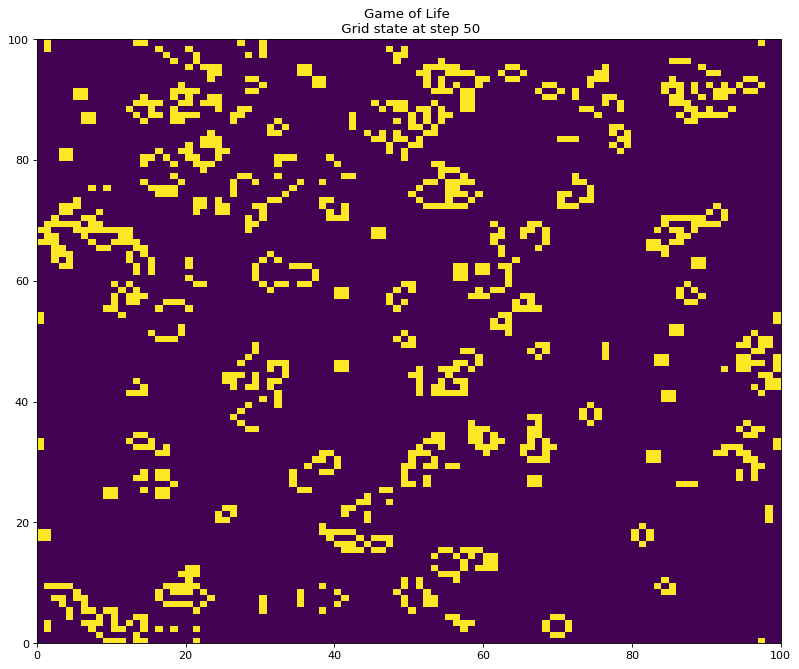

In [27]:
game = GameOfLife(N = 100, T = 50, percentage = 50 , write_frequency = 1 )
game.start()